In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
#import warnings
#warnings.filterwarnings('ignore')


housing = fetch_california_housing()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])

In [2]:
X = df.drop("target",axis =1 ).to_numpy()
y = df.target.to_numpy()

In [3]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                test_size=0.2,
                                     random_state = 42
                                )

In [4]:
#normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(16512, 8)

In [34]:
# Construction du modèle
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(1)  # Couche de sortie sans activation pour la régression
])

 

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')


# Entraînement du modèle
model.fit(X_train, y_train, epochs=500, batch_size=X_train.shape[0] , validation_split=0.2, verbose=2)


Epoch 1/500
1/1 - 2s - loss: 5.8290 - val_loss: 5.2169 - 2s/epoch - 2s/step
Epoch 2/500
1/1 - 0s - loss: 5.1649 - val_loss: 4.6112 - 106ms/epoch - 106ms/step
Epoch 3/500
1/1 - 0s - loss: 4.5829 - val_loss: 4.0675 - 109ms/epoch - 109ms/step
Epoch 4/500
1/1 - 0s - loss: 4.0612 - val_loss: 3.5733 - 106ms/epoch - 106ms/step
Epoch 5/500
1/1 - 0s - loss: 3.5892 - val_loss: 3.1272 - 135ms/epoch - 135ms/step
Epoch 6/500
1/1 - 0s - loss: 3.1643 - val_loss: 2.7285 - 143ms/epoch - 143ms/step
Epoch 7/500
1/1 - 0s - loss: 2.7867 - val_loss: 2.3836 - 129ms/epoch - 129ms/step
Epoch 8/500
1/1 - 0s - loss: 2.4596 - val_loss: 2.1013 - 129ms/epoch - 129ms/step
Epoch 9/500
1/1 - 0s - loss: 2.1919 - val_loss: 1.8872 - 119ms/epoch - 119ms/step
Epoch 10/500
1/1 - 0s - loss: 1.9842 - val_loss: 1.7339 - 132ms/epoch - 132ms/step
Epoch 11/500
1/1 - 0s - loss: 1.8307 - val_loss: 1.6221 - 117ms/epoch - 117ms/step
Epoch 12/500
1/1 - 0s - loss: 1.7103 - val_loss: 1.5320 - 125ms/epoch - 125ms/step
Epoch 13/500
1/1 - 

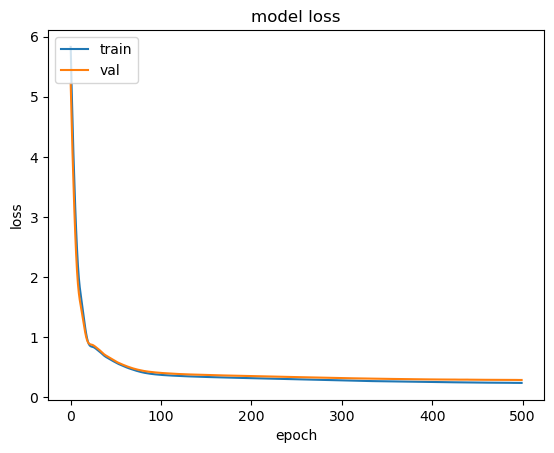

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
# Évaluation du modèle sur l'ensemble de test
test_loss = model.evaluate(X_test, y_test)
print(f"Loss on test set: {test_loss}")

129/129 [==============================] - 0s 3ms/step - loss: 0.2776
Loss on test set: 0.2776406705379486
